<a href="https://colab.research.google.com/github/clauduarte2024/Proyecto-integrado-2/blob/main/Educacion_Argentina_ipynb_en_tu_repositorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: armar una base de datos de no mas de 100 filas con datos aleatorios con apellido y nombre, numero de dni, materias de educacion nivel secundario de argentina que contenga las siguientes columnas; nota del primer trimestre, segundo  trimestre, tercer trimestre, faltas a clase

import pandas as pd
import numpy as np
import random

# Define possible subjects
subjects = ['Matemática', 'Lengua y Literatura', 'Historia', 'Geografía', 'Ciencias Naturales', 'Educación Física', 'Inglés', 'Artes', 'Música', 'Tecnología']

# Function to generate random DNI (simplified for demonstration purposes)
def generate_dni():
    return random.randint(10000000, 99999999)

# Function to generate random names and surnames
def generate_name():
    first_names = ['Ana', 'Juan', 'María', 'Pedro', 'Sofía', 'Luis', 'Martina', 'Carlos', 'Laura', 'Diego']
    last_names = ['Gómez', 'Rodríguez', 'Pérez', 'López', 'Martínez', 'García', 'Sánchez', 'Fernández', 'González', 'Díaz']

    return f'{random.choice(first_names)} {random.choice(last_names)}'

# Create an empty list to store data for the DataFrame
data = []
num_rows = 100

for i in range(num_rows):
    subject = random.choice(subjects)
    name = generate_name()
    dni = generate_dni()
    grades = [np.random.randint(1, 11) for _ in range(3)]  # Grades for 3 quarters
    absences = np.random.randint(0, 20)

    data.append([name, dni, subject, grades[0], grades[1], grades[2], absences])

# Create the DataFrame
columns = ['Nombre y Apellido', 'DNI', 'Materia', '1er Trimestre', '2do Trimestre', '3er Trimestre', 'Faltas']
df = pd.DataFrame(data, columns=columns)

# Display the DataFrame
print(df)

# Optional: Save the DataFrame to a CSV file
df.to_csv('student_grades.csv', index=False) # Save to csv file

   Nombre y Apellido       DNI              Materia  1er Trimestre  \
0        Diego López  59550778           Tecnología              1   
1      Diego Sánchez  95200122             Historia              8   
2        María López  83945587   Ciencias Naturales             10   
3         Luis Pérez  42103986   Ciencias Naturales              3   
4        Sofía Gómez  29091638  Lengua y Literatura              4   
..               ...       ...                  ...            ...   
95       Ana Sánchez  63891403               Inglés              5   
96          Ana Díaz  32782970           Tecnología              4   
97      Carlos López  46769794               Música              1   
98        Sofía Díaz  38861710           Tecnología              8   
99    María Martínez  91160117             Historia              6   

    2do Trimestre  3er Trimestre  Faltas  
0               5              4       2  
1               4              7      10  
2               5             

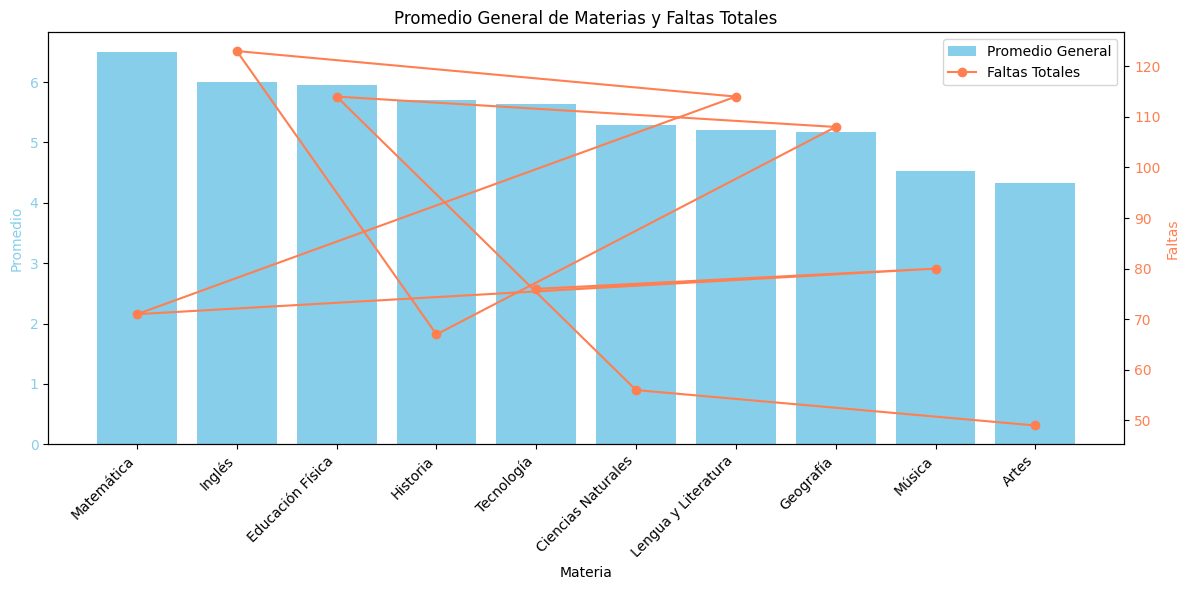

In [2]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor contrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt
import pandas as pd

# Calculate the average grade for each subject
average_grades = df.groupby('Materia')[['1er Trimestre', '2do Trimestre', '3er Trimestre']].mean().mean(axis=1)
average_grades = average_grades.sort_values(ascending=False)

# Calculate the total absences for each subject
total_absences = df.groupby('Materia')['Faltas'].sum()

# Create the bar plot
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(average_grades.index, average_grades.values, color='skyblue', label='Promedio General')
ax1.set_xlabel('Materia')
ax1.set_ylabel('Promedio', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Promedio General de Materias y Faltas Totales')

ax2 = ax1.twinx()
ax2.plot(total_absences.index, total_absences.values, marker='o', color='coral', label='Faltas Totales')
ax2.set_ylabel('Faltas', color='coral')
ax2.tick_params(axis='y', labelcolor='coral')

# Add legends and rotate x-axis labels for better readability
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [5]:
df.to_csv("datos_alumnos.csv", index=False)